**morphological operations**

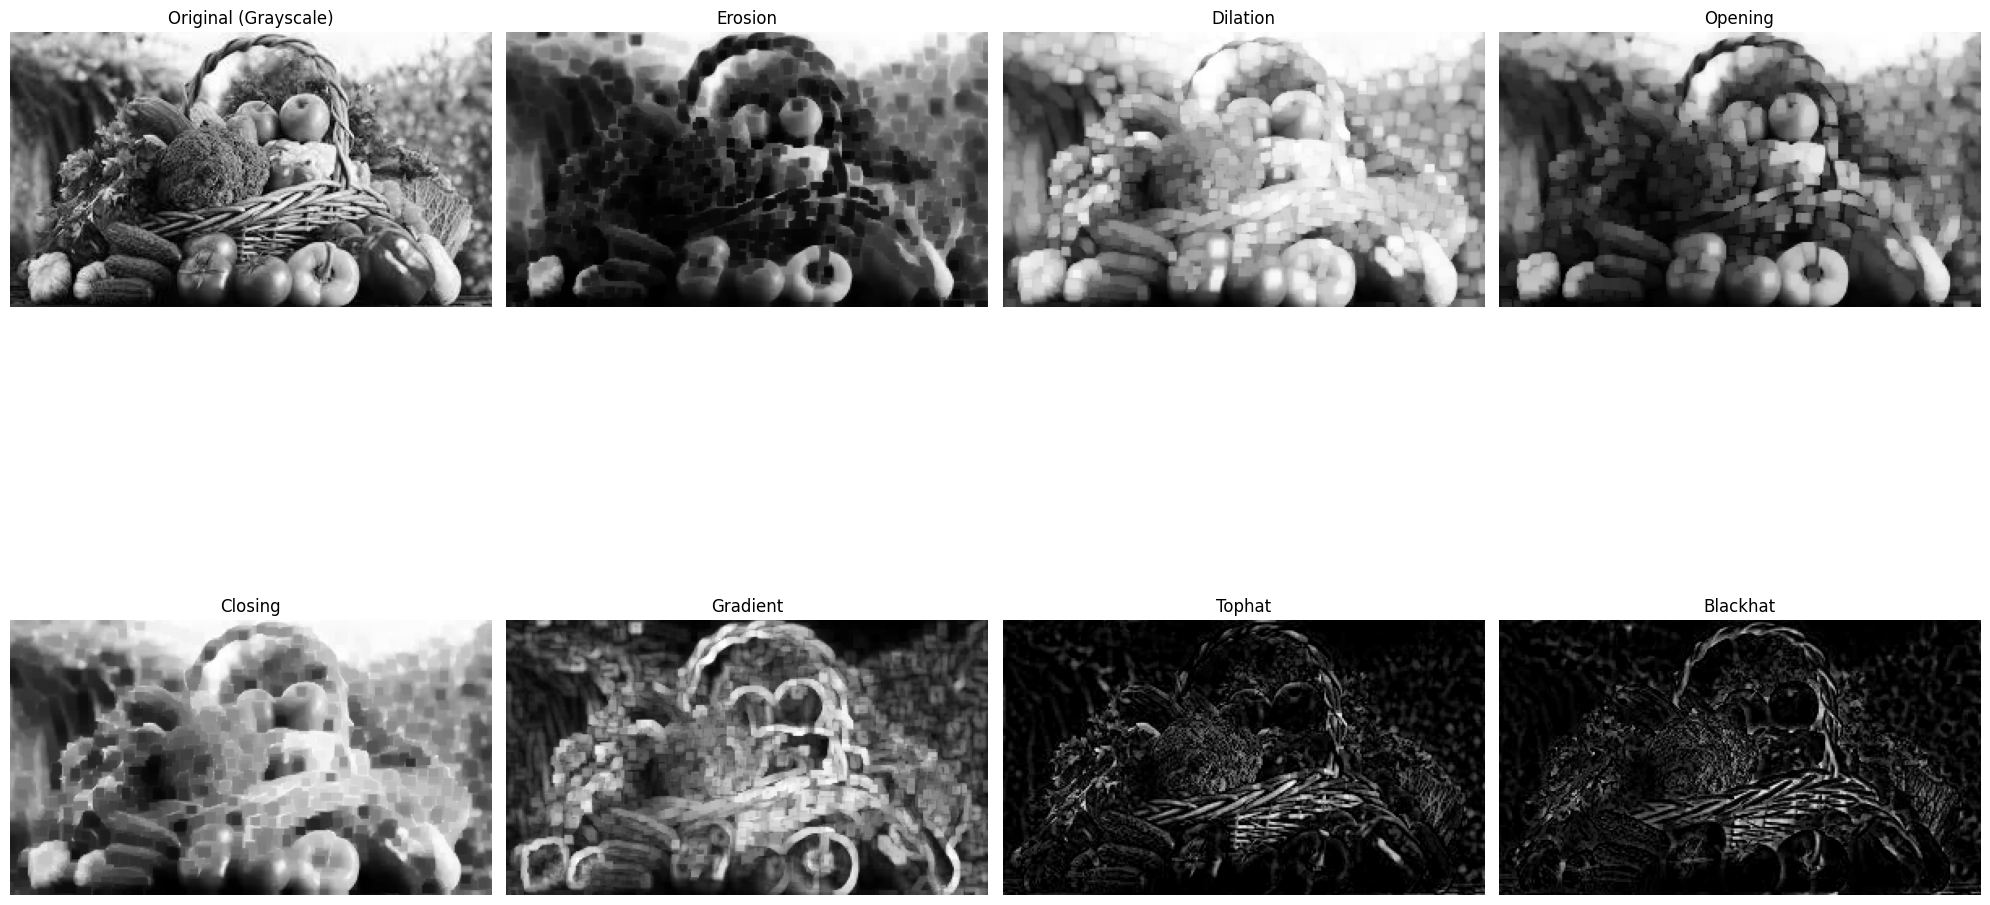

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image and convert to grayscale
img = cv.imread("/content/download (2).jpeg", 1)
if img is None:
    print("Error: Could not load image. Check the file path.")
else:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Define kernel for morphological operations
    kernel = np.ones((5, 5), np.uint8)

    # Apply morphological operations
    erosion = cv.erode(gray, kernel, iterations=1)
    dilation = cv.dilate(gray, kernel, iterations=1)
    opening = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(gray, cv.MORPH_CLOSE, kernel)
    gradient = cv.morphologyEx(gray, cv.MORPH_GRADIENT, kernel)
    tophat = cv.morphologyEx(gray, cv.MORPH_TOPHAT, kernel)
    blackhat = cv.morphologyEx(gray, cv.MORPH_BLACKHAT, kernel)

    # Create a list of titles and corresponding images
    titles = ['Original (Grayscale)', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient', 'Tophat', 'Blackhat']
    images = [gray, erosion, dilation, opening, closing, gradient, tophat, blackhat]

    # Plot all images in a single figure
    plt.figure(figsize=(20, 15))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)  # 2 rows, 4 columns
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

    # Display the plot
    plt.tight_layout()
    plt.show()


**Edge Detection**

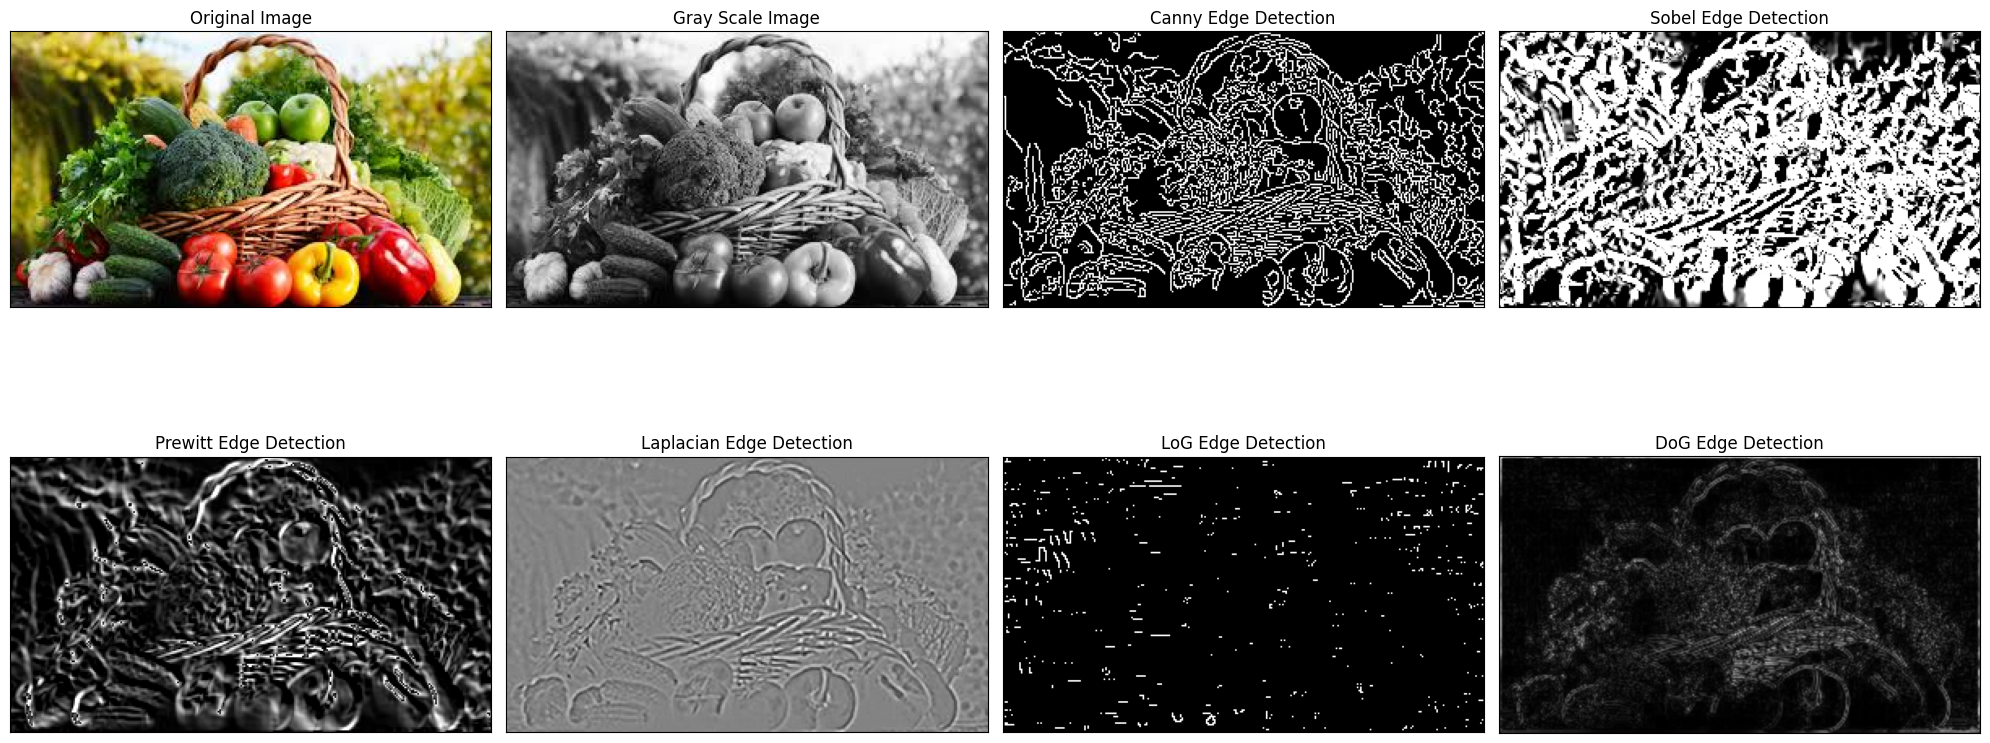

In [ ]:
import cv2
import numpy as np
import scipy.ndimage as nd
from scipy import signal
import matplotlib.pyplot as plt

# Load the original image and convert to grayscale
img = cv2.imread("/content/download (2).jpeg", 1)
if img is None:
    raise FileNotFoundError("The specified image path is incorrect or the image cannot be found.")
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur
img_gaussian = cv2.GaussianBlur(gray, (3, 3), 0)

# Canny Edge Detection
img_canny = cv2.Canny(gray, 100, 200)

# Sobel Edge Detection
img_sobelx = cv2.Sobel(img_gaussian, cv2.CV_8U, 1, 0, ksize=5)
img_sobely = cv2.Sobel(img_gaussian, cv2.CV_8U, 0, 1, ksize=5)
img_sobel = img_sobelx + img_sobely

# Prewitt Edge Detection
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

# Laplacian Edge Detection
laplacian = cv2.Laplacian(img_gaussian, cv2.CV_64F)

# Load another image for LoG and DoG operations
img2 = cv2.imread(r"/content/download (2).jpeg")
if img2 is None:
    raise FileNotFoundError("The specified image path is incorrect or the image cannot be found.")
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# LoG (Laplacian of Gaussian)
LoG = nd.gaussian_laplace(gray_img2, 2)
thres = np.absolute(LoG).mean() * 0.75
output = np.zeros(LoG.shape)

# Zero-crossing detection for LoG
w, h = output.shape[1], output.shape[0]
for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y - 1:y + 2, x - 1:x + 2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0).any():
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1

# DoG (Difference of Gaussian)
A = np.array([[0, 0, -1, -1, -1, 0, 0],
              [0, -2, -3, -3, -3, -2, 0],
              [-1, -3, 5, 5, 5, -3, -1],
              [-1, -3, 5, 16, 5, -3, -1],
              [-1, -3, 5, 5, 5, -3, -1],
              [0, -2, -3, -3, -3, -2, 0],
              [0, 0, -1, -1, -1, 0, 0]], dtype=np.float32)

ratio = img2.shape[0] / 500.0
new_width = int(img2.shape[1] / ratio)
nimg = cv2.resize(gray, (new_width, 500))

I1 = signal.convolve2d(nimg, A)
I1 = np.absolute(I1)
I1 = (I1 - np.min(I1)) / float(np.max(I1) - np.min(I1))

I2 = cv2.GaussianBlur(I1, (5, 5), 0)

# Plotting the results
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1), plt.imshow(original_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 2), plt.imshow(gray, cmap='gray')
plt.title('Gray Scale Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 3), plt.imshow(img_canny, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 4), plt.imshow(img_sobel, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 5), plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 6), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 7), plt.imshow(output, cmap='gray')
plt.title('LoG Edge Detection'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 4, 8), plt.imshow(I2, cmap='gray')
plt.title('DoG Edge Detection'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


**histogram** **equalization**

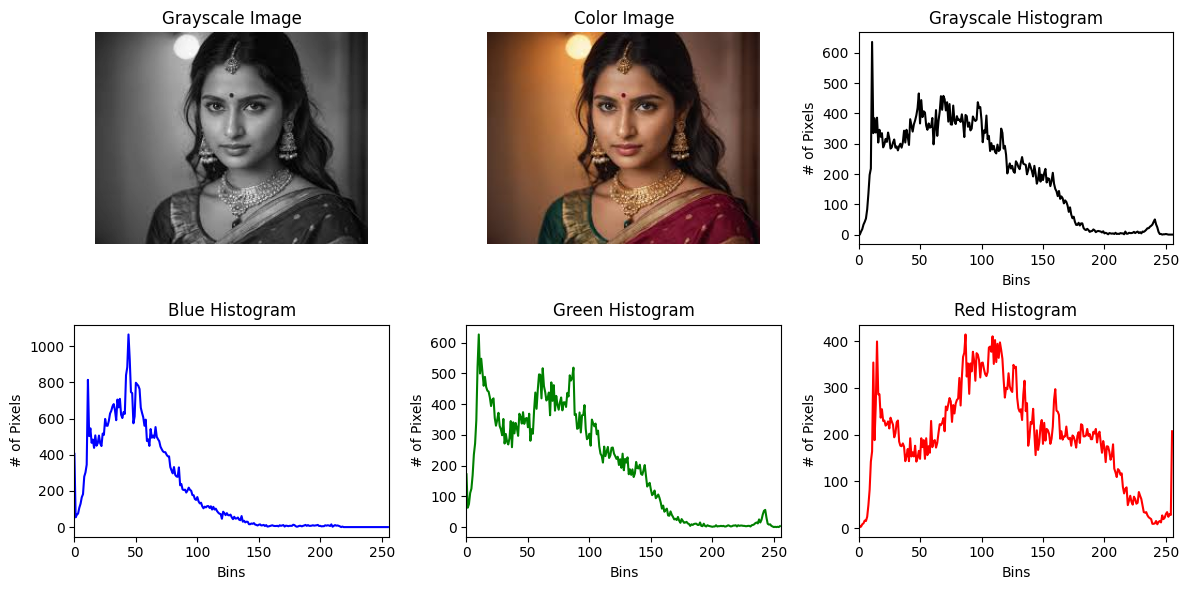

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r'/content/download (1).jpeg')

if image is None:
    print("Error: Unable to read the image file.")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    images = [gray_image, image]
    titles = ['Grayscale Image', 'Color Image']
    channels = ['Grayscale', 'Blue', 'Green', 'Red']
    colors = ['black', 'blue', 'green', 'red']

    plt.figure(figsize=(12, 6))

    for i in range(2):
        plt.subplot(2, 3, i + 1)
        if i == 0:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')

    for j, (channel, color) in enumerate(zip(channels, colors)):
        plt.subplot(2, 3, j + 3)
        if channel == 'Grayscale':
            hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        else:
            hist = cv2.calcHist([image], [j - 1], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.title(f'{channel} Histogram')
        plt.xlabel('Bins')
        plt.ylabel('# of Pixels')
        plt.xlim([0, 256])

    plt.tight_layout()
    plt.show()


In [ ]:
**ha

**harris corner**

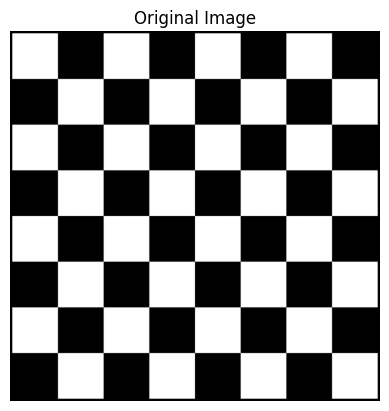

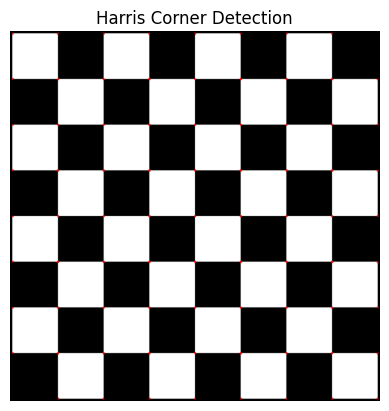

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/Chess_Board.svg.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib display

# Display original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Apply Harris Corner Detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01 * dst.max()] = [255, 0, 0]

# Display result
plt.imshow(img)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


**Brute FORCE**

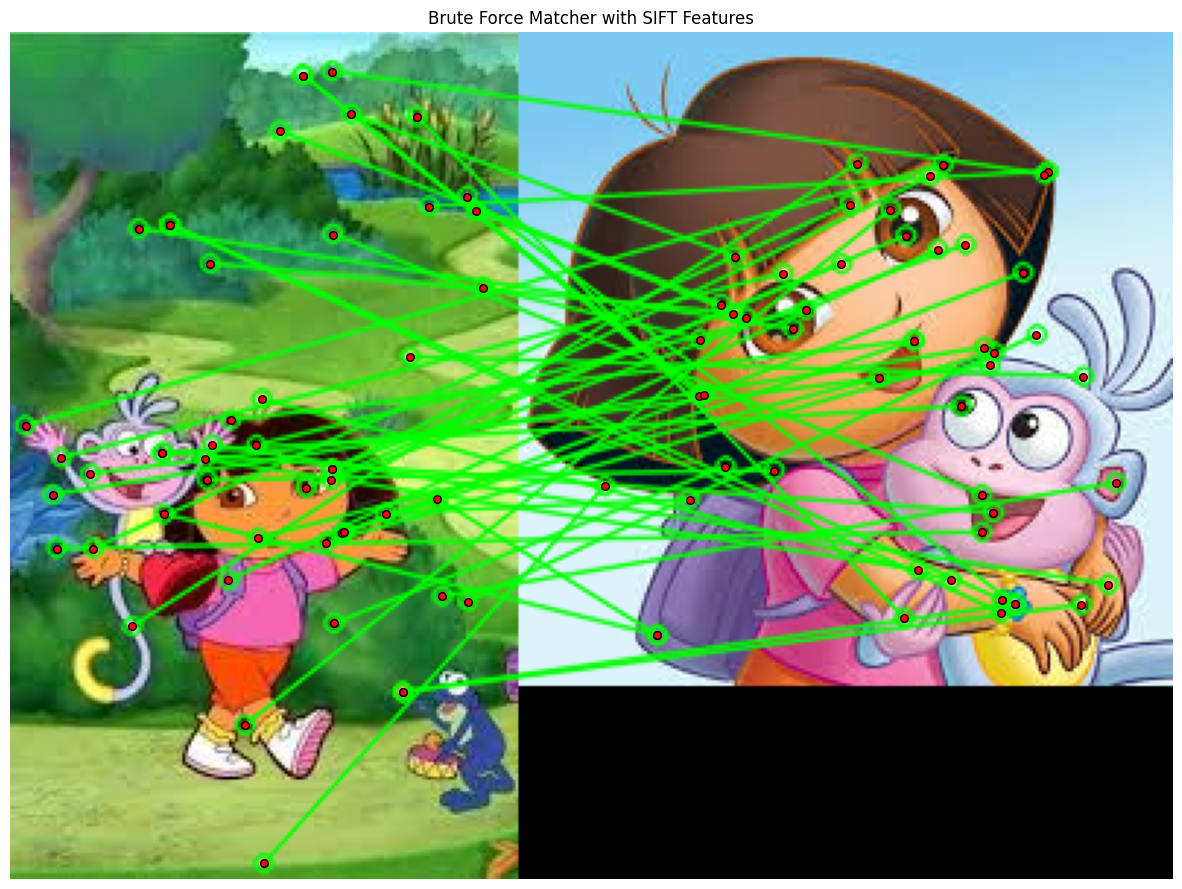

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images
image1_path = ''
image2_path = '/content/image4.jpg'

img1 = cv2.imread(image1_path)
img2 = cv2.imread(image2_path)

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT feature detection and computation
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Brute-force matcher with L2 norm
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Create an empty image to draw the matches
img_matches = np.zeros((max(gray1.shape[0], gray2.shape[0]), gray1.shape[1] + gray2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], img_matches,
                matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), flags=2)

# Display the image with matches
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('Brute Force Matcher with SIFT Features')

# Plot matching points with lines between them
for match in matches[:50]:
    img1_idx = match.queryIdx
    img2_idx = match.trainIdx
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt

    plt.scatter([x1, x2 + gray1.shape[1]], [y1, y2], c='red', s=30, edgecolors='black', marker='o')

# Remove axis
plt.axis('off')
plt.show()


**HOUGH LINE **

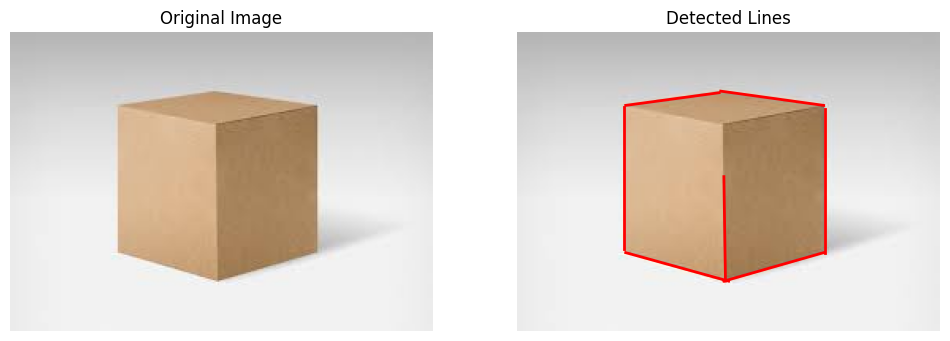

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sample image filename
image_path ='/content/box.jpeg'  # Upload this image to your Colab session

# Read the image
src = cv2.imread(image_path)
if src is None:
    raise FileNotFoundError(f"File '{image_path}' does not exist. Please check the file path and try again.")

# Convert to grayscale
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(src_gray, 50, 200)

# Perform Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)

# Display results in a single figure with subplots
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

# Plot lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

plt.show()

In [ ]:
**KMEANS**

**KMEANS**

Enter the number of clusters (K): 3


<IPython.core.display.Javascript object>

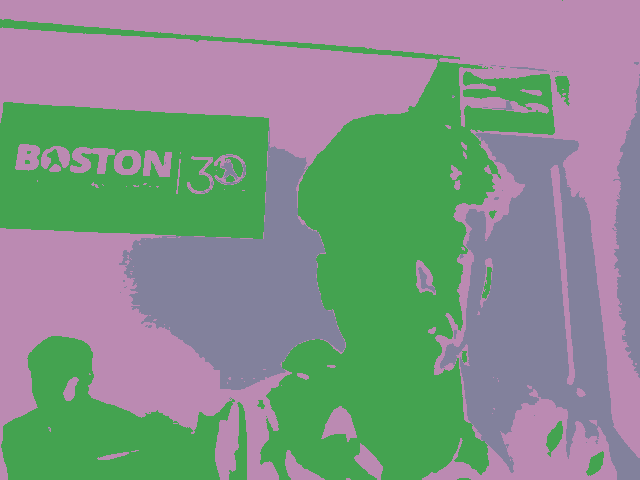

In [ ]:
# Import necessary libraries
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import io
from PIL import Image

# JavaScript to capture an image from the webcam
def capture_image():
    js = Javascript('''
    async function capture() {
        const video = document.createElement('video');
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output canvas to match the video feed.
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        video.remove();
        return canvas.toDataURL('image/png');
    }
    capture();
    ''')
    display(js)
    data = eval_js('capture()')
    binary = b64decode(data.split(',')[1])
    image = Image.open(io.BytesIO(binary))
    return cv.cvtColor(np.array(image), cv.COLOR_BGR2RGB)

# Apply K-means clustering to the captured image
def apply_kmeans(image, K=6):
    # Reshape the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria and apply K-means
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv.kmeans(pixel_values, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    # Convert centers back to uint8
    centers = np.uint8(centers)

    # Map labels to colors
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    # Create a color palette for the clusters
    colors = np.random.randint(0, 255, size=(K, 3))

    # Reshape labels to match the original image shape
    labels_reshaped = labels.reshape(image.shape[0], image.shape[1])

    # Color each cluster distinctly
    color_image = np.zeros_like(image)
    for i in range(K):
        color_image[labels_reshaped == i] = colors[i]

    return color_image

# Capture and display images from the webcam
def main():
    try:
        # Prompt the user to enter the number of clusters
        K = int(input("Enter the number of clusters (K): "))
        if K < 1:
            raise ValueError("The number of clusters (K) must be greater than 0.")
    except ValueError as e:
        print(f"Invalid input: {e}. Please enter a valid integer.")
        return

    image = capture_image()  # Capture image from the webcam
    if image is not None:
        clustered_image = apply_kmeans(image, K=K)  # Apply K-means clustering
        cv2_imshow(clustered_image)  # Display the clustered image
    else:
        print("Failed to capture image from webcam.")

main()


**PCA**

Saving download (2).jpeg to download (2) (1).jpeg


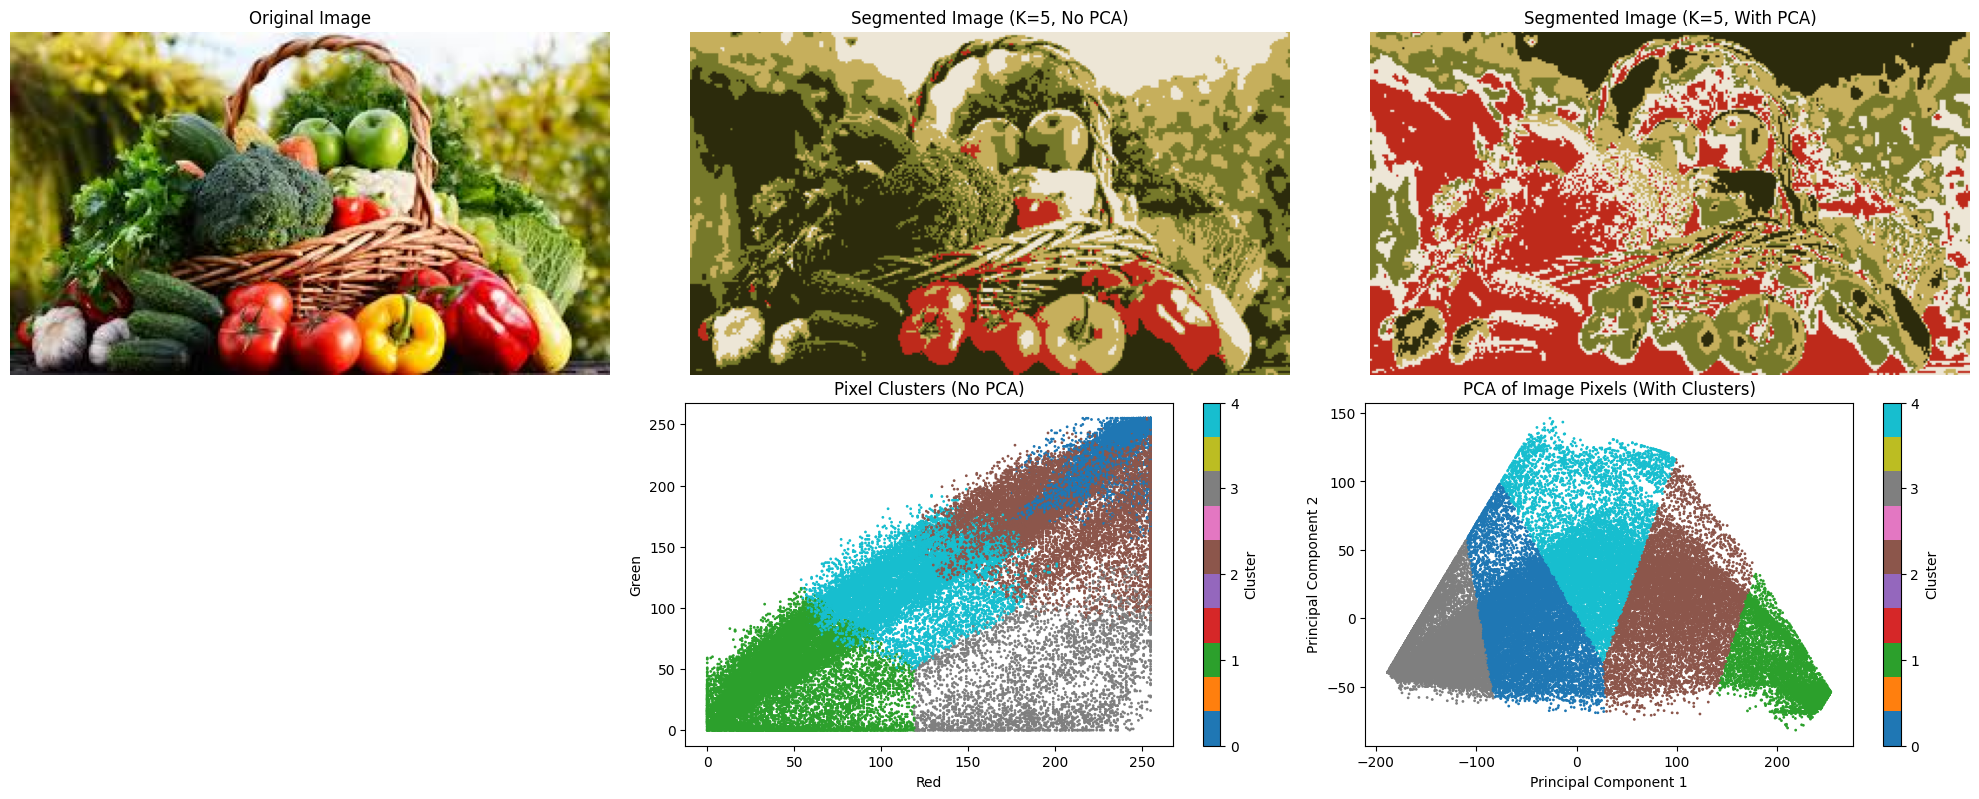

Silhouette Score (No PCA): 0.4270
Silhouette Score (With PCA): 0.4181


In [ ]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files

# Upload the image
uploaded = files.upload()

# Extract the filename from the uploaded files
image_path = list(uploaded.keys())[0]

# Function to perform K-means clustering on image pixels and plot PCA
def kmeans_on_image(image_path, cluster_n):
    # Load the image
    img = cv.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Convert the image to RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Perform K-means clustering on original pixel values (no PCA)
    term_crit = (cv.TERM_CRITERIA_EPS, 30, 0.1)
    _, labels_no_pca, centers_no_pca = cv.kmeans(pixel_values, cluster_n, None, term_crit, 10, cv.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8
    centers_no_pca = np.uint8(centers_no_pca)

    # Map the labels to center colors (without PCA)
    segmented_img_no_pca = centers_no_pca[labels_no_pca.flatten()]

    # Reshape segmented image to original dimensions (no PCA)
    segmented_img_no_pca = segmented_img_no_pca.reshape(img_rgb.shape)

    # Apply PCA to reduce the pixel values to 2 dimensions
    pca = PCA(n_components=2)
    pixel_values_pca = pca.fit_transform(pixel_values)

    # Perform K-means clustering on PCA-reduced data
    _, labels_pca, centers_pca = cv.kmeans(pixel_values_pca, cluster_n, None, term_crit, 10, cv.KMEANS_RANDOM_CENTERS)

    # Convert centers back to original image dimensions for visualization
    segmented_img_pca = centers_no_pca[labels_pca.flatten()]
    segmented_img_pca = segmented_img_pca.reshape(img_rgb.shape)

    # Plot the original, segmented (no PCA), and segmented (with PCA) images
    plt.figure(figsize=(20, 8))

    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    # Segmented image without PCA
    plt.subplot(2, 3, 2)
    plt.imshow(segmented_img_no_pca)
    plt.title(f'Segmented Image (K={cluster_n}, No PCA)')
    plt.axis('off')

    # Segmented image with PCA
    plt.subplot(2, 3, 3)
    plt.imshow(segmented_img_pca)
    plt.title(f'Segmented Image (K={cluster_n}, With PCA)')
    plt.axis('off')

    # Scatter plot for original pixel values (using first two dimensions of the pixel values)
    plt.subplot(2, 3, 5)
    scatter_no_pca = plt.scatter(pixel_values[:, 0], pixel_values[:, 1], c=labels_no_pca.flatten(), cmap='tab10', s=1)
    plt.colorbar(scatter_no_pca, ticks=range(cluster_n), label='Cluster')
    plt.title(f'Pixel Clusters (No PCA)')
    plt.xlabel('Red')
    plt.ylabel('Green')

    # PCA scatter plot
    plt.subplot(2, 3, 6)
    scatter_pca = plt.scatter(pixel_values_pca[:, 0], pixel_values_pca[:, 1], c=labels_pca.flatten(), cmap='tab10', s=1)
    plt.colorbar(scatter_pca, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of Image Pixels (With Clusters)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.tight_layout()
    plt.show()

    # Silhouette scores
    silhouette_no_pca = silhouette_score(pixel_values, labels_no_pca.flatten())
    silhouette_pca = silhouette_score(pixel_values_pca, labels_pca.flatten())

    print(f'Silhouette Score (No PCA): {silhouette_no_pca:.4f}')
    print(f'Silhouette Score (With PCA): {silhouette_pca:.4f}')

# Number of clusters
cluster_n = 5
kmeans_on_image(image_path, cluster_n)

Saving 4a444d3083a21006679bf473571363ed (1).jpg to 4a444d3083a21006679bf473571363ed (1) (1).jpg
Precision: 0.00%
Recall: 0.00%


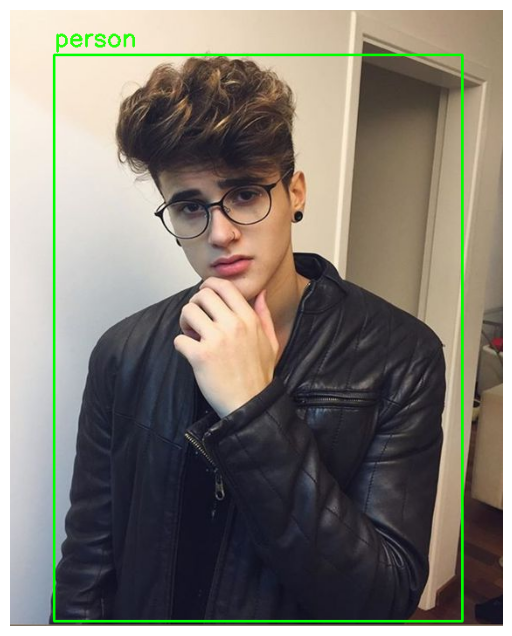

In [ ]:
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Load the pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Function to compute IoU (Intersection over Union)
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1_p, y1_p, x2_p, y2_p = box2

    # Calculate the intersection area
    inter_x1 = max(x1, x1_p)
    inter_y1 = max(y1, y1_p)
    inter_x2 = min(x2, x2_p)
    inter_y2 = min(y2, y2_p)
    inter_area = max(0, inter_x2 - inter_x1 + 1) * max(0, inter_y2 - inter_y1 + 1)

    # Calculate the area of both the boxes
    box1_area = (x2 - x1 + 1) * (y2 - y1 + 1)
    box2_area = (x2_p - x1_p + 1) * (y2_p - y1_p + 1)

    # Calculate the union area
    union_area = box1_area + box2_area - inter_area

    # Compute the IoU
    iou = inter_area / union_area

    return iou

# Function to perform object detection
def detect_objects(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Image not loaded. Check the file path.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform detection
    with torch.no_grad():
        output = model([image_tensor])

    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # COCO dataset labels
    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        # (continues...)
    ]

    detection_threshold = 0.7

    # Assuming ground truth boxes and labels (for accuracy calculation)
    # Replace this with actual ground truth data in your case
    ground_truth_boxes = [(50, 50, 200, 200)]  # Example ground truth
    ground_truth_labels = [1]  # Corresponding labels for ground truth

    correct_detections = 0
    total_detections = 0
    total_ground_truth = len(ground_truth_boxes)

    # IoU threshold for a "correct" detection
    iou_threshold = 0.5

    # Draw detected boxes
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            (x1, y1, x2, y2) = boxes[i].astype(int)
            label = coco_labels[labels[i]]
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

            # Check IoU with ground truth boxes for accuracy evaluation
            total_detections += 1
            for gt_box in ground_truth_boxes:
                iou = compute_iou(boxes[i], gt_box)
                if iou > iou_threshold:
                    correct_detections += 1
                    break

    # Calculate Precision and Recall
    precision = correct_detections / total_detections if total_detections > 0 else 0
    recall = correct_detections / total_ground_truth if total_ground_truth > 0 else 0

    # Display precision and recall
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")

    # Show the image with detections
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Run detection and evaluation
if image_path:
    detect_objects(image_path)


**FASTER RCNN**

Saving xar.jpeg to xar.jpeg


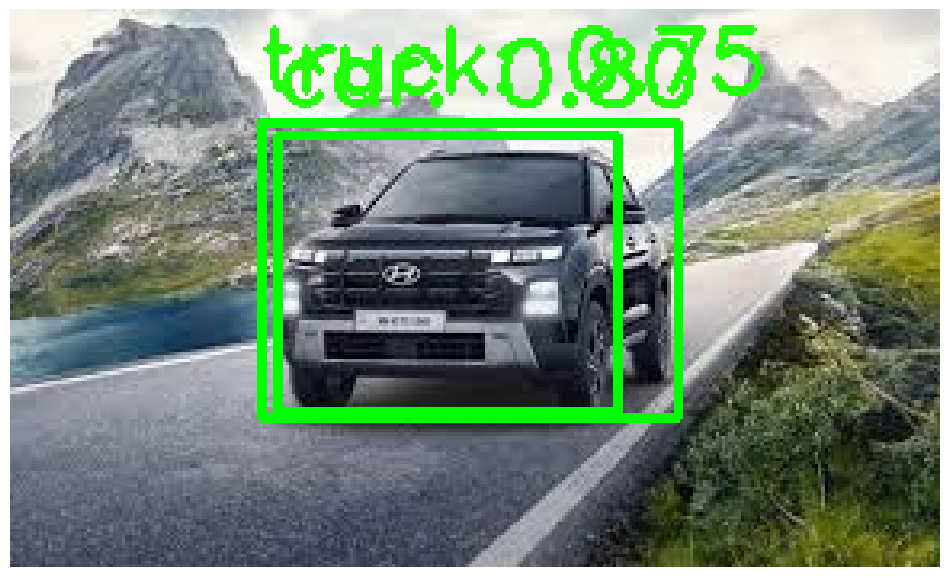

In [ ]:
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Load the pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Function to compute IoU (Intersection over Union)
def compute_iou(box1, box2):
    x1, y1, x2, y2 = box1
    x1_p, y1_p, x2_p, y2_p = box2

    # Calculate the intersection area
    inter_x1 = max(x1, x1_p)
    inter_y1 = max(y1, y1_p)
    inter_x2 = min(x2, x2_p)
    inter_y2 = min(y2, y2_p)
    inter_area = max(0, inter_x2 - inter_x1 + 1) * max(0, inter_y2 - inter_y1 + 1)

    # Calculate the area of both the boxes
    box1_area = (x2 - x1 + 1) * (y2 - y1 + 1)
    box2_area = (x2_p - x1_p + 1) * (y2_p - y1_p + 1)

    # Calculate the union area
    union_area = box1_area + box2_area - inter_area

    # Compute the IoU
    iou = inter_area / union_area

    return iou

# Function to perform object detection and display accuracy on bounding boxes
def detect_objects(image_path):
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Image not loaded. Check the file path.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform detection
    with torch.no_grad():
        output = model([image_tensor])

    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # COCO dataset labels
    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        # (continues...)
    ]

    detection_threshold = 0.7

    # Assuming ground truth boxes and labels (for accuracy calculation)
    # Replace this with actual ground truth data in your case
    ground_truth_boxes = [(50, 50, 200, 200)]  # Example ground truth
    ground_truth_labels = [1]  # Corresponding labels for ground truth

    # IoU threshold for a "correct" detection
    iou_threshold = 0.5

    # Draw detected boxes and display IoU or confidence
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            (x1, y1, x2, y2) = boxes[i].astype(int)
            label = coco_labels[labels[i]]

            # Draw the bounding box
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Calculate IoU with ground truth (for accuracy display)
            iou = 0
            for gt_box in ground_truth_boxes:
                iou = compute_iou(boxes[i], gt_box)
                if iou > iou_threshold:
                    break

            # Add label and IoU/Confidence score
            text = f"{label}: {iou:.2f}" if iou > iou_threshold else f"{label}: {scores[i]:.2f}"
            cv2.putText(image_rgb, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Show the image with detections and IoU/Confidence scores
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Run detection and show IoU/Confidence in bounding boxes
if image_path:
    detect_objects(image_path)


**WATER**

<ipython-input-5-6b6b45fd177b>:20: RuntimeWarning: invalid value encountered in sqrt
  gradmag = np.sqrt(sobelx*2 + sobely*2)
<ipython-input-5-6b6b45fd177b>:27: RuntimeWarning: invalid value encountered in cast
  gradmag2 = cv2.watershed(cv2.cvtColor((gradmag * 255 / gradmag.max()).astype(np.uint8), cv2.COLOR_GRAY2BGR), markers)


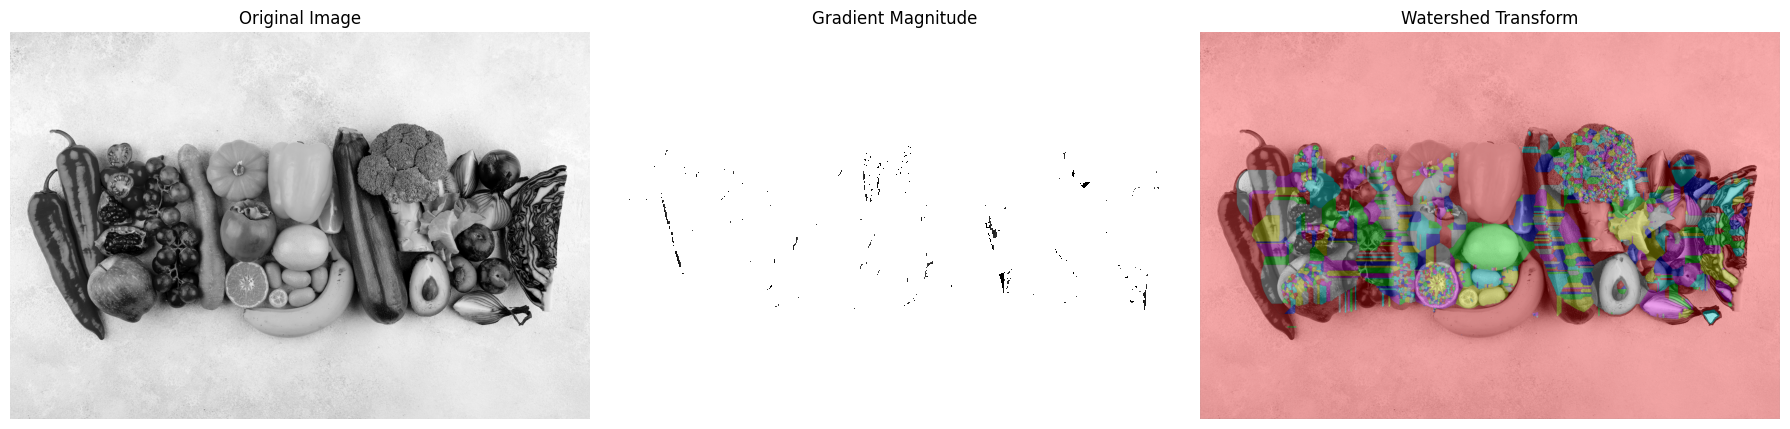

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

I = cv2.imread("/content/image25.jpeg")

# Check if the image is read correctly
if I is None:
    raise FileNotFoundError('Could not open or find the image.')

# Step 2: Convert to Grayscale (if necessary)
if len(I.shape) == 3:
    I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Step 3: Noise Reduction
I_filtered = cv2.GaussianBlur(I, (5, 5), 2)  # Apply Gaussian filter to reduce noise

# Step 4: Compute the Gradient Magnitude
sobelx = cv2.Sobel(I_filtered, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(I_filtered, cv2.CV_64F, 0, 1, ksize=3)
gradmag = np.sqrt(sobelx*2 + sobely*2)

# Step 5: Marker-Based Segmentation
_, binary_image = cv2.threshold(I_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
D = ndi.distance_transform_edt(binary_image)
local_max = cv2.dilate(cv2.erode(D, None), None)
markers, _ = ndi.label(local_max)
gradmag2 = cv2.watershed(cv2.cvtColor((gradmag * 255 / gradmag.max()).astype(np.uint8), cv2.COLOR_GRAY2BGR), markers)

# Step 6: Apply the Watershed Transform
labels = cv2.watershed(cv2.cvtColor(I_filtered, cv2.COLOR_GRAY2BGR), gradmag2)

# Step 7: Define 7 distinct colors for visualization
colors = [
    [255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0],
    [0, 255, 255], [255, 0, 255], [192, 192, 192]
]

# Create an empty image for the result
Lrgb = np.zeros((*labels.shape, 3), dtype=np.uint8)

# Color the regions
for label in np.unique(labels):
    if label == -1:  # Ignore background
        continue
    mask = labels == label
    color_idx = (label - 1) % 7
    Lrgb[mask] = colors[color_idx]

# Step 8: Visualize the Results
plt.figure(figsize=(10, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gradient Magnitude
plt.subplot(2, 2, 2)
plt.imshow(gradmag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

# Binary Image
plt.subplot(2, 2, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Watershed Transform
plt.subplot(2, 2, 4)
plt.imshow(Lrgb)
plt.title('Watershed Transform')
plt.axis('off')

plt.tight_layout()
plt.show()